ACLED Central America data from 01 January 2019 - 07 April 2020
Link to ACLED: https://acleddata.com/#/dashboard 
Information on attribution: https://acleddata.com/acleddatanew/wp-content/uploads/dlm_uploads/2019/07/ACLED_TermsofUseAttributionPolicy_4.2019.pdf

#### Library code I usually keep on top to check/confirm libraries and environments

In [3]:
#!pip list
#pip install
#!conda env list
#!conda activate <env name>

# 1) Data Import and Basic Exploration

#### Main libraries used in this notebook are pandas, numpy, and seaborn. Always keep together to keep track so you aren't calling your libraries different names.

- Second block is a neat addition to show all the columns when printing the DF. Just run one time and it saves the options. Uncomment if you want more rows, but might make notebook super long

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#pd.set_option('display.max_rows', 500)

#### Optional: import of the time library. Has code there to put before and after code to time it.

In [6]:
import time
print(time.time())

#start_time = time.time()
#print("michael")
#print("Time using code: {} sec".format(time.time() - start_time))

1590766849.8818705


#### Initial read-in of ACLED CSV
- Make sure your path is correct

In [7]:
path = r"sampleACLED.csv"
df = pd.read_csv(path)

#### Get size of table.
- df.shape returns a tuple, so you can use each individually.

In [8]:
#df.shape
print("The dataframe has {} Rows and {} Columns.".format(df.shape[0], df.shape[1]))

The dataframe has 368 Rows and 31 Columns.


#### View dataframe to make sure the csv was read in correct.

- Notice if you scroll Right/Left you can see all 31 columns. (from the earlier commands pd.set_option('display.max_columns', 500) and pd.set_option('display.width', 1000))

In [9]:
df.head(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7030381,188,CRI320,320,4-Apr-20,2020,1,Protests,Peaceful protest,Protesters (Costa Rica),NaN,6,NaN,NaN,0,60,Central America,Costa Rica,Puntarenas,Puntarenas,NaN,Puntarenas,9.9763,-84.8384,1,La Prensa Libre (Costa Rica),National,"On 4 April 2020, in Puntarenas (Puntarenas), a...",0,1586202169,CRI
1,7030293,222,SLV971,971,3-Apr-20,2020,1,Protests,Peaceful protest,Protesters (El Salvador),Labour Group (El Salvador); SITTOJ: Union for ...,6,NaN,NaN,0,60,Central America,El Salvador,San Salvador,San Salvador,NaN,San Salvador,13.6894,-89.1872,1,El Mundo (El Salvador),National,"On 3 April 2020, in San Salvador (San Salvador...",0,1586202168,SLV
2,7030454,340,HND1518,1518,4-Apr-20,2020,2,Violence against civilians,Attack,Unidentified Armed Group (Honduras),NaN,3,Civilians (Honduras),NaN,7,37,Central America,Honduras,Francisco Morazan,Distrito Central,NaN,Tegucigalpa,14.0818,-87.2068,1,Proceso Digital,National,"On 4 April 2020, in Tegucigalpa, a male corpse...",1,1586202169,HND


#### 4 different ways to find the  dataframe column names.
- There are multiple ways to do almost everything in pandas. Use what helps you the most moving forward, or if it is a one step action, then use the simplest.

In [10]:
#1)
print(df.columns)
#2)
#print(list(df))
#3)
#cols = [print(col) for col in df.columns]
#4)
#sorted(df)

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date', 'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1', 'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2', 'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude', 'geo_precision', 'source', 'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'], dtype='object')


#### Describe: Using df.describe() to see general information
- If you call normal df.describe() it only provides numeric fields.

In [11]:
df.describe()

,data_id,iso,event_id_no_cnty,year,time_precision,inter1,inter2,interaction,latitude,longitude,geo_precision,fatalities,timestamp
count,3.680000e+02,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,3.680000e+02
mean,6.962237e+06,473.747283,1236.394022,2019.233696,1.182065,4.198370,3.394022,43.372283,19.023808,-96.898448,1.114130,0.771739,1.583224e+09
std,2.442887e+04,89.253145,3631.355257,0.423757,0.400278,1.555967,3.312048,15.381435,5.750051,9.054363,0.358648,1.935490,9.533360e+05
min,6.926003e+06,84.000000,103.000000,2019.000000,1.000000,1.000000,0.000000,10.000000,7.960800,-117.019000,1.000000,0.000000,1.582840e+09
25%,6.943890e+06,484.000000,274.750000,2019.000000,1.000000,3.000000,0.000000,37.000000,16.754000,-101.555325,1.000000,0.000000,1.582840e+09
50%,6.959325e+06,484.000000,364.000000,2019.000000,1.000000,3.000000,3.000000,37.000000,19.290900,-99.139500,1.000000,0.000000,1.582840e+09
75%,6.968618e+06,484.000000,418.250000,2019.000000,1.000000,6.000000,7.000000,60.000000,20.913525,-89.340725,1.000000,1.000000,1.582840e+09
max,7.030462e+06,591.000000,16766.000000,2020.000000,3.000000,6.000000,8.000000,60.000000,32.641200,-77.765400,3.000000,24.000000,1.586202e+09


- If you call df.describe(include=[np.object]) it only gives you string fields.

- But you'll notice, that it gives categorical aggregations rather than numerical. This can easily show you Top is most frequent, and freq is how many times.

In [12]:
df.describe(include=[np.object])

,event_id_cnty,event_date,event_type,sub_event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,region,country,admin1,admin2,admin3,location,source,source_scale,notes,iso3
count,368,368,368,368,368,98,218,44,368,368,368,360,39,368,368,368,368,368
unique,368,55,6,12,37,42,28,28,1,8,56,176,18,194,82,5,368,8
top,PAN401,8-Jan-19,Violence against civilians,Attack,Unidentified Armed Group (Mexico),Labour Group (Mexico),Civilians (Mexico),Labour Group (Mexico),Central America,Mexico,Guerrero,Acapulco de Juarez,Bella Vista,Acapulco de Juarez,Critica (Panama),National,"On 10 January 2019, in Tepeaca, Puebla, there ...",MEX
freq,1,46,151,143,85,27,137,7,368,272,29,17,10,16,19,259,1,272


- If you call df.describe(include='all') provides summary statisics for all columns.

- An aggregate of the two above describes.

In [13]:
df.describe(include='all')

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
count,3.680000e+02,368.000000,368,368.000000,368,368.000000,368.000000,368,368,368,98,368.000000,218,44,368.000000,368.000000,368,368,368,360,39,368,368.000000,368.000000,368.000000,368,368,368,368.000000,3.680000e+02,368
unique,NaN,NaN,368,NaN,55,NaN,NaN,6,12,37,42,NaN,28,28,NaN,NaN,1,8,56,176,18,194,NaN,NaN,NaN,82,5,368,NaN,NaN,8
top,NaN,NaN,PAN401,NaN,8-Jan-19,NaN,NaN,Violence against civilians,Attack,Unidentified Armed Group (Mexico),Labour Group (Mexico),NaN,Civilians (Mexico),Labour Group (Mexico),NaN,NaN,Central America,Mexico,Guerrero,Acapulco de Juarez,Bella Vista,Acapulco de Juarez,NaN,NaN,NaN,Critica (Panama),National,"On 10 January 2019, in Tepeaca, Puebla, there ...",NaN,NaN,MEX
freq,NaN,NaN,1,NaN,46,NaN,NaN,151,143,85,27,NaN,137,7,NaN,NaN,368,272,29,17,10,16,NaN,NaN,NaN,19,259,1,NaN,NaN,272
mean,6.962237e+06,473.747283,NaN,1236.394022,NaN,2019.233696,1.182065,NaN,NaN,NaN,NaN,4.198370,NaN,NaN,3.394022,43.372283,NaN,NaN,NaN,NaN,NaN,NaN,19.023808,-96.898448,1.114130,NaN,NaN,NaN,0.771739,1.583224e+09,NaN
std,2.442887e+04,89.253145,NaN,3631.355257,NaN,0.423757,0.400278,NaN,NaN,NaN,NaN,1.555967,NaN,NaN,3.312048,15.381435,NaN,NaN,NaN,NaN,NaN,NaN,5.750051,9.054363,0.358648,NaN,NaN,NaN,1.935490,9.533360e+05,NaN
min,6.926003e+06,84.000000,NaN,103.000000,NaN,2019.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.960800,-117.019000,1.000000,NaN,NaN,NaN,0.000000,1.582840e+09,NaN
25%,6.943890e+06,484.000000,NaN,274.750000,NaN,2019.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,16.754000,-101.555325,1.000000,NaN,NaN,NaN,0.000000,1.582840e+09,NaN
50%,6.959325e+06,484.000000,NaN,364.000000,NaN,2019.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.290900,-99.139500,1.000000,NaN,NaN,NaN,0.000000,1.582840e+09,NaN
75%,6.968618e+06,484.000000,NaN,418.250000,NaN,2019.000000,1.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,7.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.913525,-89.340725,1.000000,NaN,NaN,NaN,1.000000,1.582840e+09,NaN


#### Basic Counts
- Retrieve count of records in every attribute in the dataframe. Same as the 'count' row in the String Describe.

In [14]:
df.count()

data_id             368
iso                 368
event_id_cnty       368
event_id_no_cnty    368
event_date          368
year                368
time_precision      368
event_type          368
sub_event_type      368
actor1              368
assoc_actor_1        98
inter1              368
actor2              218
assoc_actor_2        44
inter2              368
interaction         368
region              368
country             368
admin1              368
admin2              360
admin3               39
location            368
latitude            368
longitude           368
geo_precision       368
source              368
source_scale        368
notes               368
fatalities          368
timestamp           368
iso3                368
dtype: int64

#### Using groupby() to get counts of events by column

- Event Date

In [15]:
df.groupby('event_date')['data_id'].count()
#df_dates.to_csv(r'C:/Users/Caitlin/OneDrive/ACLED_CentralAmerica/DataVisFiles/CountOfEventsDay.csv') #export csv from df

event_date
10-Jan-19    26
10-Mar-20     1
10-Nov-19     3
11-Jan-19    31
12-Feb-20     1
12-Jan-19    36
13-Jan-19    44
13-Mar-20     3
13-Nov-19     1
14-Jan-19     4
14-Nov-19     1
15-Mar-20     1
15-Nov-19     4
16-Mar-20     1
16-Nov-19     1
17-Feb-20     2
17-Mar-20     1
18-Feb-20     1
18-Mar-20     2
18-Nov-19     3
19-Feb-20     2
19-Nov-19     1
2-Mar-20      2
20-Feb-20     2
20-Nov-19     2
21-Feb-20     1
21-Mar-20     1
21-Nov-19     9
22-Feb-20     1
22-Nov-19     2
23-Nov-19     2
24-Feb-20     1
27-Jan-20     2
28-Feb-20     1
28-Jan-20     1
29-Feb-20     1
29-Jan-20     2
3-Apr-20      9
3-Feb-20      3
3-Mar-20      4
30-Jan-20     1
4-Apr-20     15
4-Feb-20      3
4-Mar-20      5
5-Feb-20      1
5-Mar-20      1
6-Mar-20      5
7-Feb-20      3
7-Jan-19     36
7-Mar-20      1
8-Jan-19     46
8-Mar-20      3
9-Feb-20      1
9-Jan-19     30
9-Mar-20      1
Name: data_id, dtype: int64

- Country

In [16]:
df.groupby('country')['data_id'].count()
#df_country.to_csv(r'C:/Users/Caitlin/OneDrive/ACLED_CentralAmerica/DataVisFiles/CountPerCountry.csv') #export csv from df

country
Belize           8
Costa Rica       1
El Salvador      7
Guatemala       10
Honduras        15
Mexico         272
Nicaragua       16
Panama          39
Name: data_id, dtype: int64

- Event Type

In [17]:
df.groupby('event_type')['data_id'].count()

event_type
Battles                        39
Explosions/Remote violence      1
Protests                      142
Riots                          20
Strategic developments         15
Violence against civilians    151
Name: data_id, dtype: int64

- Sub-Events

In [18]:
df.groupby('sub_event_type')['data_id'].count()

sub_event_type
Abduction/forced disappearance        8
Armed clash                          39
Arrests                               2
Attack                              143
Change to group/activity              3
Grenade                               1
Headquarters or base established      1
Looting/property destruction          9
Mob violence                         11
Peaceful protest                    138
Protest with intervention             4
Violent demonstration                 9
Name: data_id, dtype: int64

- Geographic Precision

In [19]:
df.groupby('geo_precision')['data_id'].count()

geo_precision
1    331
2     32
3      5
Name: data_id, dtype: int64

#### Using value_counts()
- value_counts() does the same as a groupby if you just want counts.

In [20]:
#df['event_date'].value_counts()
df['geo_precision'].value_counts()

1    331
2     32
3      5
Name: geo_precision, dtype: int64

In [25]:
df['event_type'].value_counts(normalize=True,dropna=False).round(2)

Violence against civilians    0.41
Protests                      0.39
Battles                       0.11
Riots                         0.05
Strategic developments        0.04
Explosions/Remote violence    0.00
Name: event_type, dtype: float64

#### You can pass in different methods to do quick summaries of your column aggregates.
- Don't forget you can always use help() to see what a method/function does within a library.
- If you can't find it, you can use dir() to see the library structure

In [26]:
help(pd.value_counts)
#dir(pd)

Help on function value_counts in module pandas.core.algorithms:

value_counts(values, sort: bool = True, ascending: bool = False, normalize: bool = False, bins=None, dropna: bool = True) -> 'Series'
    Compute a histogram of the counts of non-null values.
    
    Parameters
    ----------
    values : ndarray (1-d)
    sort : bool, default True
        Sort by values
    ascending : bool, default False
        Sort in ascending order
    normalize: bool, default False
        If True then compute a relative histogram
    bins : integer, optional
        Rather than count values, group them into half-open bins,
        convenience for pd.cut, only works with numeric data
    dropna : bool, default True
        Don't include counts of NaN
    
    Returns
    -------
    Series



#### Normalize
- Using the options within the method, we can easily normalize the data

In [27]:
df['geo_precision'].value_counts(normalize=True)

1    0.899457
2    0.086957
3    0.013587
Name: geo_precision, dtype: float64

In [28]:
dates_series = df['event_date'].value_counts()
dates_series

8-Jan-19     46
13-Jan-19    44
7-Jan-19     36
12-Jan-19    36
11-Jan-19    31
9-Jan-19     30
10-Jan-19    26
4-Apr-20     15
3-Apr-20      9
21-Nov-19     9
6-Mar-20      5
4-Mar-20      5
14-Jan-19     4
3-Mar-20      4
15-Nov-19     4
10-Nov-19     3
4-Feb-20      3
7-Feb-20      3
3-Feb-20      3
8-Mar-20      3
18-Nov-19     3
13-Mar-20     3
20-Nov-19     2
17-Feb-20     2
23-Nov-19     2
27-Jan-20     2
18-Mar-20     2
22-Nov-19     2
20-Feb-20     2
29-Jan-20     2
2-Mar-20      2
19-Feb-20     2
28-Feb-20     1
9-Feb-20      1
15-Mar-20     1
9-Mar-20      1
14-Nov-19     1
12-Feb-20     1
7-Mar-20      1
30-Jan-20     1
16-Nov-19     1
5-Mar-20      1
29-Feb-20     1
28-Jan-20     1
16-Mar-20     1
22-Feb-20     1
24-Feb-20     1
5-Feb-20      1
10-Mar-20     1
21-Mar-20     1
17-Mar-20     1
13-Nov-19     1
18-Feb-20     1
19-Nov-19     1
21-Feb-20     1
Name: event_date, dtype: int64

#### Make sure you know what options you are using especially with nulls

In [34]:
df['actor2'].value_counts()
#df['actor2'].value_counts(normalize=True)
#df['actor2'].value_counts(dropna=False)
#df['actor2'].value_counts(dropna=False, normalize=True)

Civilians (Mexico)                                            137
Police Forces of Mexico (2018-) State Police                   10
Military Forces of Mexico (2018-)                              10
Civilians (Honduras)                                            8
Unidentified Gang (Mexico)                                      7
Civilians (Guatemala)                                           6
Unidentified Armed Group (Mexico)                               5
Police Forces of Mexico (2018-)                                 4
Civilians (Nicaragua)                                           4
Unidentified Gang (Honduras)                                    3
Civilians (Panama)                                              3
Unidentified Gang (Belize)                                      3
Rioters (Mexico)                                                2
Civilians (International)                                       2
Unidentified Gang (Guatemala)                                   1
Police For

- If you have numeric data you can do bins

In [38]:
df['fatalities'].value_counts(bins=5)

(-0.025, 4.8]    361
(4.8, 9.6]         4
(19.2, 24.0]       1
(14.4, 19.2]       1
(9.6, 14.4]        1
Name: fatalities, dtype: int64

#### Important check - Make sure to regularly check what you are working with with type(). Series and DataFrames work different but get mixed up.
- Extra info on the topic https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html

In [37]:
deaths = df['fatalities'].value_counts()
type(deaths)

pandas.core.series.Series

In [ ]:
#ax = sns.distplot(deaths)

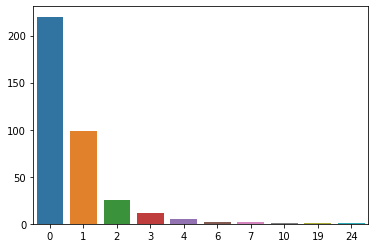

In [187]:
sns.barplot(deaths.index, deaths.values)

# Finding Anomalies

#### Original Code

- Find dates that are not "normal" i.e. are outside of the mean +/- 2 times the standard deviation
- OUTPUT: Prints a list of dates and number of events

In [39]:
mean = dates_series.mean()
std = np.std(dates_series)

for count, index in zip(dates_series, dates_series.index):
    # If the value for the date is less than the mean - 2 times the standard deviation or more than the mean + 2 time the std
    if count < (mean - 2*std) or count > (mean + 2*std):
        print(str(index).split(" ")[0], count)

8-Jan-19 46
13-Jan-19 44
7-Jan-19 36
12-Jan-19 36
11-Jan-19 31
9-Jan-19 30


#### Other Version to do same action

- Difference is cleaning up variable usage
- Make sure variables are clear and accurate.
- Important - OUTPUT is just printing, you don't end up with anything

In [41]:
dates_mean = dates_series.mean()
dates_std = dates_series.std()
std_low = dates_mean - 2*dates_std
std_high = dates_mean + 2*dates_std

for count, index in zip(dates_series, dates_series.index):
    # If the value for the date is less than the mean - 2 times the standard deviation or more than the mean + 2 time the std
    if count < std_low or count > std_high:
        print(str(index).split(" ")[0], count)

8-Jan-19 46
13-Jan-19 44
7-Jan-19 36
12-Jan-19 36
11-Jan-19 31
9-Jan-19 30


In [44]:
date_output = dates_series[(dates_series.values > std_high) | (dates_series.values < std_low)]
date_output

8-Jan-19     46
13-Jan-19    44
7-Jan-19     36
12-Jan-19    36
11-Jan-19    31
9-Jan-19     30
Name: event_date, dtype: int64

#### *NOTE: The above code is working on a pandas Series. groupby()'s output is a Series. You can do a lot more with Dataframes over Series.*

#### Convert Series to Dataframe
- We're using the < dates_series = df['event_date'].value_counts() > Series we created before

In [45]:
gbdates_df = pd.DataFrame(dates_series.reset_index(name="count"))
gbdates_df.head(10)

,index,count
0,8-Jan-19,46
1,13-Jan-19,44
2,7-Jan-19,36
3,12-Jan-19,36
4,11-Jan-19,31
5,9-Jan-19,30
6,10-Jan-19,26
7,4-Apr-20,15
8,3-Apr-20,9
9,21-Nov-19,9


- If converted to a Dataframe, you can use a simple slice. And then you can continue to use sort and other methods since it is a dataframe
- We can now apply the same query we did before to the dataframe

In [46]:
#dates_filtered = gbdates_df[gbdates_df['count'] > 10]
dates_filtered = gbdates_df[(gbdates_df['count'] < std_low) | (gbdates_df['count'] > std_high)]
dates_filtered.sort_values(by='count', ascending=False)

,index,count
0,8-Jan-19,46
1,13-Jan-19,44
2,7-Jan-19,36
3,12-Jan-19,36
4,11-Jan-19,31
5,9-Jan-19,30


# Geo-Precision Levels Analysis

In [ ]:
#subset the geo_precision event records for further analysis 
df_prec1 = df[df.geo_precision == 1]
df_prec2 = df[df.geo_precision == 2]
df_prec3 = df[df.geo_precision == 3]

In [ ]:
#create grouped dataframes for each precision level by event type
#this cell creates a table that shows the number of records for each event type for each geo-precision
df_prec1Event = df_prec1.groupby('event_type')['data_id'].count().to_frame(name='count_prec1').reset_index()
df_prec2Event = df_prec2.groupby('event_type')['data_id'].count().to_frame(name='count_prec2').reset_index()
df_prec3Event = df_prec3.groupby('event_type')['data_id'].count().to_frame(name='count_prec3').reset_index()
#merge tables to get count by event type for each spatial precision
join1 = df_prec1Event.merge(df_prec2Event)
join2 = join1.merge(df_prec3Event)
join2
#join2.to_csv(r'C:/Users/Caitlin/OneDrive/ACLED_CentralAmerica/DataVisFiles/PrecCountEvents.csv') #export table to csv

#### What is the above code doing?
- Slicing a Dataframe by geo_precision
- Grouping by event type into a Series -> then converting back into a dataframe
- Merging them back together to make a dataframe

### Grouping Data Options

#### 1) Groupby
- Since you are groupby-ing twice in the above code, you can do it at once. A little advanced with the way to set this up properly.

In [204]:
#help(pd.DataFrame.groupby)

In [49]:
groupby_test = df.groupby(['event_type', 'geo_precision'])['geo_precision'].count().unstack().fillna(0)
#type(groupby_test)
groupby_test

geo_precision,1,2,3
event_type,,,
Battles,35.0,4.0,0.0
Explosions/Remote violence,1.0,0.0,0.0
Protests,136.0,5.0,1.0
Riots,17.0,3.0,0.0
Strategic developments,10.0,2.0,3.0
Violence against civilians,132.0,18.0,1.0


#### 2) Pivot Table
- Also works well with dataframes. Also a little advanced with options, and if you want to add more specification.

In [208]:
#help(pd.pivot_table)

In [50]:
pivot_test = df.pivot_table(index='event_type', columns='geo_precision', aggfunc={'geo_precision':len}, fill_value=0)
pivot_test

geo_precision       
geo_precision                          1   2  3
event_type                                     
Battles                               35   4  0
Explosions/Remote violence             1   0  0
Protests                             136   5  1
Riots                                 17   3  0
Strategic developments                10   2  3
Violence against civilians           132  18  1

#### 3) Crosstab
- Simplified way to aggregate/group data. Built in options to advance further.
- Great walkthrough on how it works. https://pbpython.com/pandas-crosstab.html

In [211]:
#help(pd.crosstab)

In [51]:
#df_precision_events = df[['event_type','geo_precision']]
df_precision_events = pd.crosstab(df['event_type'],df['geo_precision'])
df_precision_events

geo_precision,1,2,3
event_type,,,
Battles,35,4,0
Explosions/Remote violence,1,0,0
Protests,136,5,1
Riots,17,3,0
Strategic developments,10,2,3
Violence against civilians,132,18,1


- Can use the additional options to quickly add aggregations and totals to your data
- 'margins' adds in totals for your columns/rows
- can change 'dropna' to keep nulls

In [52]:
df_precision_events = pd.crosstab(df['event_type'],df['geo_precision']
                                  ,margins=True,
                                  margins_name="Total",
                                  dropna=False)
df_precision_events

geo_precision,1,2,3,Total
event_type,,,,
Battles,35,4,0,39
Explosions/Remote violence,1,0,0,1
Protests,136,5,1,142
Riots,17,3,0,20
Strategic developments,10,2,3,15
Violence against civilians,132,18,1,151
Total,331,32,5,368


In [56]:
df_precision_events = pd.crosstab(df['event_type'],df['geo_precision'],
                                  colnames=['Precision Level'],
                                  rownames=['Event Type'],
                                  margins=True,
                                  margins_name="Total",
                                  dropna=False,
                                  normalize=True
                                  ).round(4)
#normalize=True
#normalize='columns'
#normalize='index'
df_precision_events


Precision Level,1,2,3,Total
Event Type,,,,
Battles,0.0951,0.0109,0.0000,0.1060
Explosions/Remote violence,0.0027,0.0000,0.0000,0.0027
Protests,0.3696,0.0136,0.0027,0.3859
Riots,0.0462,0.0082,0.0000,0.0543
Strategic developments,0.0272,0.0054,0.0082,0.0408
Violence against civilians,0.3587,0.0489,0.0027,0.4103
Total,0.8995,0.0870,0.0136,1.0000


#### Original Code with Country added
- Looped through each Country, created a new DataFrame based off name, then ran the same code.

In [ ]:
#create grouped dataframes for each precision level by country
#this cell creates a table that shows the number of records for each country for each geo-precision
df_prec1Country = df_prec1.groupby('country')['data_id'].count().to_frame(name='count_prec1').reset_index()
df_prec2Country = df_prec2.groupby('country')['data_id'].count().to_frame(name='count_prec2').reset_index()
df_prec3Country = df_prec3.groupby('country')['data_id'].count().to_frame(name='count_prec3').reset_index()
#merge tables to get count by country for each spatial precision
join1 = df_prec1Country.merge(df_prec2Country)
join22 = join1.merge(df_prec3Country)
join22

In [ ]:
#TO DO
#add a column on the table that calculates the percent of total for each precision level 

In [ ]:
#Test for loop to create geo-precision tables for each country
master_country_list = []
country_list = df.country.unique()
for country in country_list:
    country_df  = df[df.country==country]
    df_prec1 = country_df[country_df.geo_precision == 1]
    df_prec2 = country_df[country_df.geo_precision == 2]
    df_prec3 = country_df[country_df.geo_precision == 3]
    df_prec1Event = df_prec1.groupby('event_type')['data_id'].count().to_frame(name='count_prec1').reset_index()
    df_prec2Event = df_prec2.groupby('event_type')['data_id'].count().to_frame(name='count_prec2').reset_index()
    df_prec3Event = df_prec3.groupby('event_type')['data_id'].count().to_frame(name='count_prec3').reset_index()
    join1 = df_prec1Event.merge(df_prec2Event)
    join2 = join1.merge(df_prec3Event)
    join2
    master_country_list.append(country_df)

In [ ]:
len(master_country_list)

In [ ]:
print(country_list)

#### Run crosstab with Country included to do it all at once.
- Pass in a List of columns to group by another level.
- This time we are using [df['country'],df['geo_precision']]
- Note if we don't do dropna=False whole columns will not show up since there isn't any data

In [57]:
df_country_events = pd.crosstab(df['event_type'],
                                [df['country'],df['geo_precision']])
df_country_events

country                    Belize       Costa Rica El Salvador Guatemala Honduras Mexico        Nicaragua Panama   
geo_precision                   1  2  3          1           1         1        1      1   2  3         1      1  2
event_type                                                                                                         
Battles                         3  0  0          0           0         2        3     27   4  0         0      0  0
Explosions/Remote violence      0  0  0          0           0         0        0      1   0  0         0      0  0
Protests                        0  1  0          1           7         2        2     77   3  1        12     35  1
Riots                           0  0  0          0           0         0        0     16   3  0         1      0  0
Strategic developments          2  0  1          0           0         0        2      5   2  2         1      0  0
Violence against civilians      1  0  0          0           0         6        8    112  18  1         2      3  0

- We can add in the other options again to improve the view, or normalize the data

In [58]:
df_country_events = pd.crosstab(df['event_type'],
                                [df['country'],df['geo_precision']],
                                margins=True,
                                margins_name="Total",
                                dropna=False,
                                #normalize='columns'
                               ).round(4)
#,margins=True,margins_name="Total",dropna=False,normalize=True).round(4)                                  
#normalize=True
#normalize='columns'
#normalize='index'
df_country_events

country                    Belize       Costa Rica       El Salvador       Guatemala       Honduras       Mexico        Nicaragua       Panama       Total
geo_precision                   1  2  3          1  2  3           1  2  3         1  2  3        1  2  3      1   2  3         1  2  3      1  2  3      
event_type                                                                                                                                                
Battles                         3  0  0          0  0  0           0  0  0         2  0  0        3  0  0     27   4  0         0  0  0      0  0  0    39
Explosions/Remote violence      0  0  0          0  0  0           0  0  0         0  0  0        0  0  0      1   0  0         0  0  0      0  0  0     1
Protests                        0  1  0          1  0  0           7  0  0         2  0  0        2  0  0     77   3  1        12  0  0     35  1  0   142
Riots                           0  0  0          0  0  0           0  0  0         0  0  0        0  0  0     16   3  0         1  0  0      0  0  0    20
Strategic developments          2  0  1          0  0  0           0  0  0         0  0  0        2  0  0      5   2  2         1  0  0      0  0  0    15
Violence against civilians      1  0  0          0  0  0           0  0  0         6  0  0        8  0  0    112  18  1         2  0  0      3  0  0   151
Total                           6  1  1          1  0  0           7  0  0        10  0  0       15  0  0    238  30  4        16  0  0     38  1  0   368

### Visualize a Crosstab with Seaborn Heatmap

In [59]:
country_ctab = pd.crosstab(df['event_type'], [df['country'],df['geo_precision']])

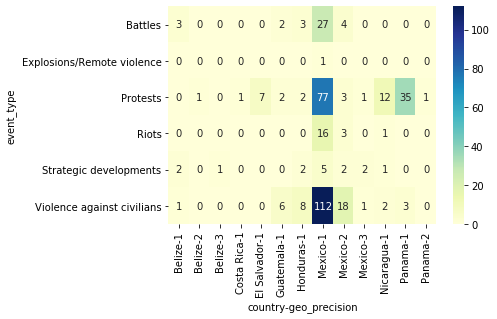

In [61]:
sns.heatmap(country_ctab,cmap="YlGnBu", annot=True, fmt='d', cbar=True)

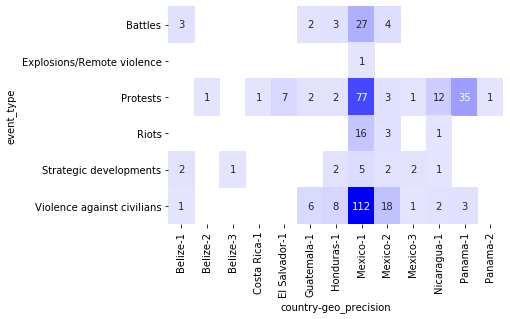

In [62]:
cmap = sns.light_palette("blue", as_cmap=True)
sns.heatmap(country_ctab,cmap=cmap, mask=country_ctab<1, annot=True, fmt='d', cbar=False)

#### Additional information about CrossTab and Seaborn
- https://pbpython.com/pandas-crosstab.html
- https://learn.datacamp.com/courses/data-visualization-with-seaborn

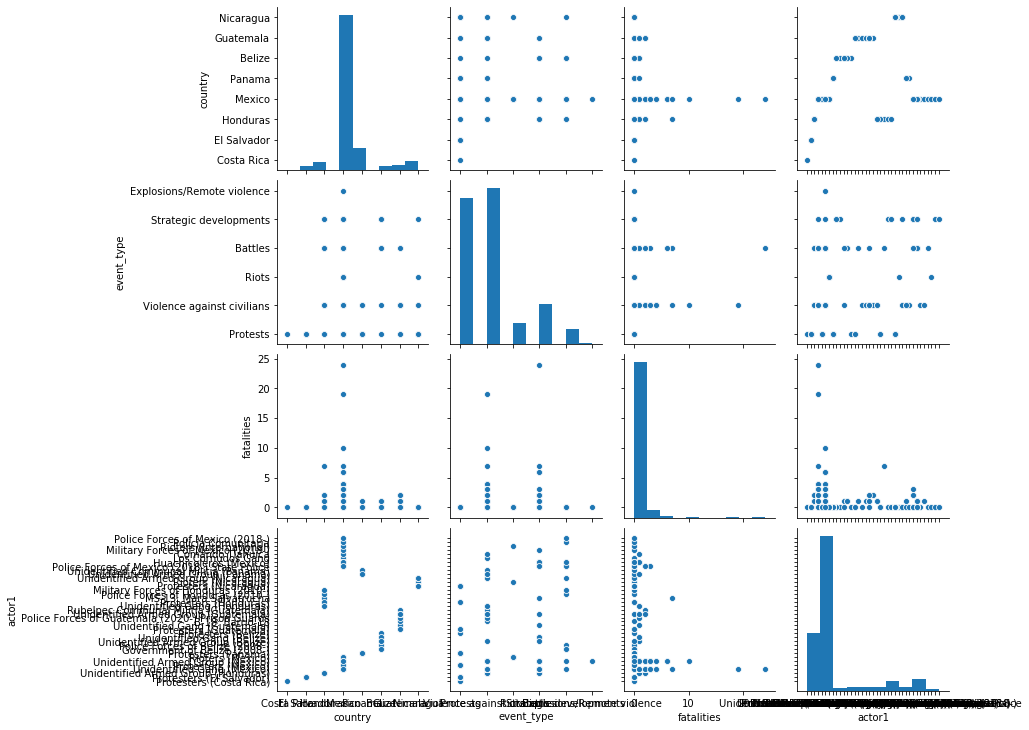

In [235]:
sns.pairplot(df, vars=["country","event_type","fatalities","actor1"])

# Analysis of Null Attributes/Levels of Nulls

#### Use df.info() to see non-null counts and the type of the columns

In [65]:
df.info()
#df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           368 non-null    int64  
 1   iso               368 non-null    int64  
 2   event_id_cnty     368 non-null    object 
 3   event_id_no_cnty  368 non-null    int64  
 4   event_date        368 non-null    object 
 5   year              368 non-null    int64  
 6   time_precision    368 non-null    int64  
 7   event_type        368 non-null    object 
 8   sub_event_type    368 non-null    object 
 9   actor1            368 non-null    object 
 10  assoc_actor_1     98 non-null     object 
 11  inter1            368 non-null    int64  
 12  actor2            218 non-null    object 
 13  assoc_actor_2     44 non-null     object 
 14  inter2            368 non-null    int64  
 15  interaction       368 non-null    int64  
 16  region            368 non-null    object 
 1

#### Quick heatmap based off of nulls in DataFrame using df.isnull()

In [67]:
#df.isnull()

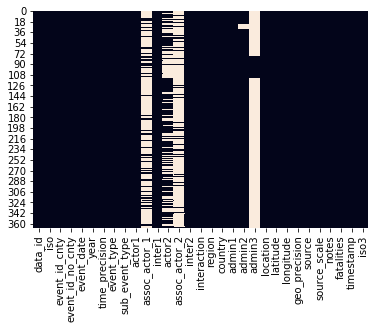

In [68]:
sns.heatmap(df.isnull(), cbar=False)

#### Get the numbers for the column and create a plot
- Using df.isnull() - we get a series
- We can treat this the same as before

In [69]:
null_count = df.isnull().sum()
null_count
#type(null_count)

data_id               0
iso                   0
event_id_cnty         0
event_id_no_cnty      0
event_date            0
year                  0
time_precision        0
event_type            0
sub_event_type        0
actor1                0
assoc_actor_1       270
inter1                0
actor2              150
assoc_actor_2       324
inter2                0
interaction           0
region                0
country               0
admin1                0
admin2                8
admin3              329
location              0
latitude              0
longitude             0
geo_precision         0
source                0
source_scale          0
notes                 0
fatalities            0
timestamp             0
iso3                  0
dtype: int64

In [70]:
null_count = null_count[null_count.values > 0].sort_values(ascending=False)
null_count

admin3           329
assoc_actor_2    324
assoc_actor_1    270
actor2           150
admin2             8
dtype: int64

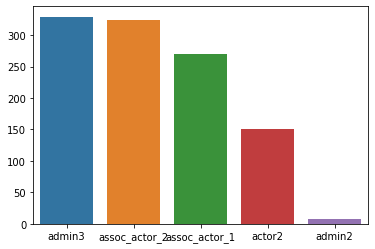

In [71]:
sns.barplot(null_count.index, null_count.values)

#### Helpful cell to track all of your variables

In [72]:
%who

cmap	 count	 country_ctab	 date_output	 dates_filtered	 dates_mean	 dates_series	 dates_std	 deaths	 
df	 df_country_events	 df_precision_events	 gbdates_df	 groupby_test	 index	 mean	 np	 null_count	 
path	 pd	 pivot_test	 sns	 start_time	 std	 std_high	 std_low	 time	 



# End Michael Additions

# Paired Attributes

In [ ]:
#TO DO
#Analysis of paired attributes
#pair one: event type and geo-precision
#pair two: sub-event type and geo-precision
#pair three: event type and sub-event type
#pair four: actor1 and event type
#pair five: actor1 and sub-event type

# By Country Analysis - Mexico

In [ ]:
#mexico analysis - create the dataframe
df_mexico = df[df.country=='Mexico']

In [ ]:
#Count of events by day in Mexico
df_datesMex = df_mexico.groupby('event_date')['data_id'].count()
#df_datesMex
df_dates.to_csv(r'C:/Users/Caitlin/OneDrive/ACLED_CentralAmerica/DataVisFiles/CountOfEventsDayMexico.csv') #export csv from df
#TO DO
#Find way to calculate which days have no records (maybe use a sort by date)

In [ ]:
#find dates that are not "normal" i.e. are outside of the mean +/- 2 times the standard deviation
#prints a list of dates and number of events for Mexico dataset specifically
meanMex = df_datesMex.mean()
stdMex = np.std(df_datesMex)

for count, index in zip(df_datesMex, df_datesMex.index):
    # If the value for the date is less than the mean - 2 times the standard deviation or more than the mean + 2 time the std
    if count < (meanMex - 2*stdMex) or count > (meanMex + 2*std):
        print(str(index).split(" ")[0], count)

In [ ]:
#count of each event type for Mexico
df_eventTypeMex = df_mexico.groupby('event_type')['data_id'].count()
df_eventTypeMex
#TO DO
#Add column with percent of Mexico dataset

In [ ]:
#count of each sub event type for Mexico
df_subEventTypeMex = df_mexico.groupby('sub_event_type')['data_id'].count()
df_subEventTypeMex
#TO DO
#Add column with percent of Mexico dataset